<a href="https://colab.research.google.com/github/Arshiya109/Fundamentals-of-Deep-Learning/blob/main/Basics_of_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Basic**

Here we will start with the Fundamentals of the deep learning.

Firstly we will understand "What is mean bydeep learning?".

Deep learning is a subset of machine learning that employs artificial neural networks to learn from data in a manner similar to how the human brain operates. It is termed "deep" because these neural networks contain multiple layers, allowing the model to learn progressively more complex features from the data.

To grasp this concept, we'll begin with a basic example of image classification. Suppose we want to train a deep learning model to classify images of animals. We would provide the model with a large dataset of labeled animal images, such as cats, dogs, and horses. This process involves several methods and techniques that we will cover.

## 1.Importing the Necessary Libraries

Now we will import the required liabraries.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


Here we're using the CIFAR-10 dataset in which it contains 60,000 (32x32) color images in 10 classes, such as dogs, cats, airplanes and many more.

## 2. Defining the Deep Learning Model

Now, we'll define a simple neural network with three fully connected layers. The forward() method defines the forward pass of the network.


In [2]:
# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## 3. Loading and Preprocessing the Data

We use the torchvision.datasets.MNIST module to download and load the MNIST dataset. We apply a transformation to normalize the input images.

Here we are using the nn.CrossEntropyLoss as the loss function and optim.SGD as the optimizer for our MNIST Dataset.

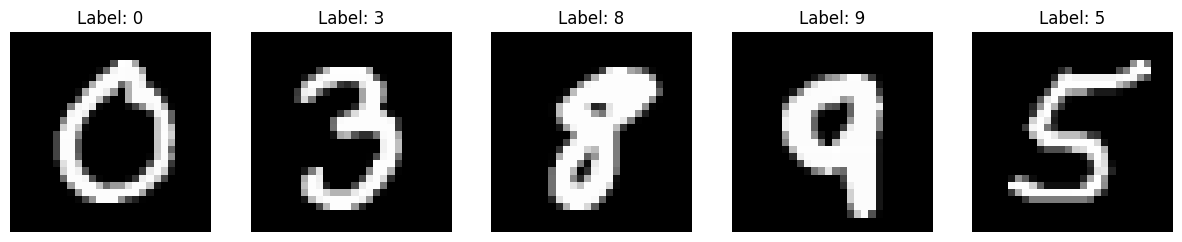

In [4]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Define the loss function and optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

def visualize_samples(loader, num_samples=5):
    dataiter = iter(loader)
    images, labels = next(dataiter)

    images = images[:num_samples]
    labels = labels[:num_samples]

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        image = images[i].numpy().squeeze()
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {labels[i].item()}')
        axes[i].axis('off')

    plt.show()

# Visualize some samples from the train loader
visualize_samples(trainloader, num_samples=5)

## 4. Training the Model

This step is an important aspect Deep learning. Here we are training the model for 10 epochs, using a batch size of the 64. In each iteration, we forward the input through the network, computing the loss, backpropagating the gradients, and updating the model parameters.

In [ ]:
# Train the model
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 2.216
[1,   200] loss: 1.829
[1,   300] loss: 1.186
[1,   400] loss: 0.754
[1,   500] loss: 0.585
[1,   600] loss: 0.474
[1,   700] loss: 0.442
[1,   800] loss: 0.398
[1,   900] loss: 0.384
[2,   100] loss: 0.353
[2,   200] loss: 0.336
[2,   300] loss: 0.334
[2,   400] loss: 0.318
[2,   500] loss: 0.322
[2,   600] loss: 0.299
[2,   700] loss: 0.307
[2,   800] loss: 0.289
[2,   900] loss: 0.294
[3,   100] loss: 0.289
[3,   200] loss: 0.275
[3,   300] loss: 0.270
[3,   400] loss: 0.254
[3,   500] loss: 0.252
[3,   600] loss: 0.258
[3,   700] loss: 0.244
[3,   800] loss: 0.253
[3,   900] loss: 0.240
[4,   100] loss: 0.236
[4,   200] loss: 0.225
[4,   300] loss: 0.229
[4,   400] loss: 0.223
[4,   500] loss: 0.216
[4,   600] loss: 0.208
[4,   700] loss: 0.203
[4,   800] loss: 0.224
[4,   900] loss: 0.212
[5,   100] loss: 0.205
[5,   200] loss: 0.200
[5,   300] loss: 0.191
[5,   400] loss: 0.192
[5,   500] loss: 0.207
[5,   600] loss: 0.198
[5,   700] loss: 0.176
[5,   800] 

## 5. Evaluating the Model

After training the dataset, we can evaluate the model's performance based on the test set. We are computing the overall accuracy of the network on the 10,000 test images.



In [ ]:
# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 96 %


## CONCLUSION:

This simple example provides a solid foundation for understanding the basic structure and workflow of training a deep learning model using PyTorch. It covers the essential components, such as defining the network architecture, loading and preprocessing data, setting up the training process, and evaluating the model's performance.

